In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [3]:
X = X / 255

In [4]:
random_subset = np.random.choice(range(len(X)), size=1000)
X_sample = X[random_subset]
y_sample = y[random_subset]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
print('Accuracy on training set:', knn.score(X_train, y_train))
print('Accuracy on test set:', knn.score(X_test, y_test))

Accuracy on training set: 0.92125
Accuracy on test set: 0.855


Dimensionality Reduction using PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

In [9]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [10]:
knn.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [11]:
print('Accuracy on training set:', knn.score(X_train_reduced, y_train))
print('Accuracy on test set:', knn.score(X_test_reduced, y_test))

Accuracy on training set: 0.93375
Accuracy on test set: 0.88


In [12]:
dimensions = range(10, 701, 10)
scores = []

for n_dimensions in dimensions:
    pca = PCA(n_components=n_dimensions)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    knn.fit(X_train_reduced, y_train)
    score = knn.score(X_test_reduced, y_test)
    scores.append(score)

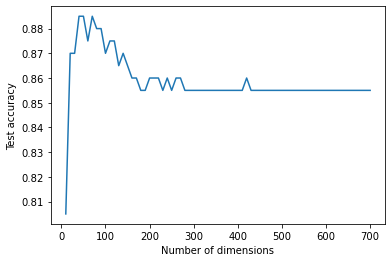

In [13]:
plt.plot(dimensions, scores)
plt.xlabel('Number of dimensions')
plt.ylabel('Test accuracy')

plt.savefig('figures/MNIST_results.pdf')